In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')


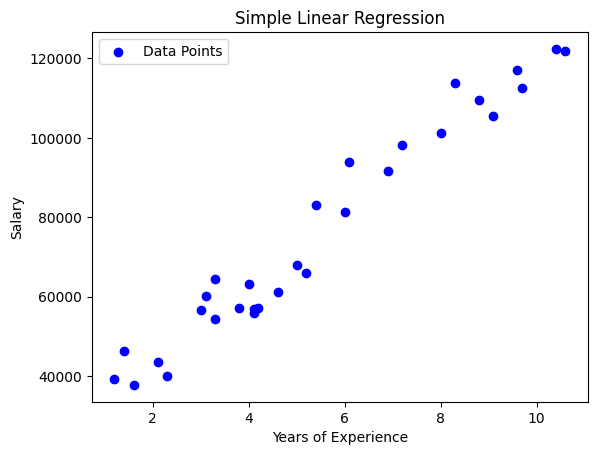

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
linear_data = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

# Check column names
print(linear_data.columns)

# Extract relevant columns
X = linear_data['YearsExperience']
Y = linear_data['Salary']
x = np.array(X, dtype=np.float64)
y = np.array(Y, dtype=np.float64)

plt.scatter(X, Y, label='Data Points', color='blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [3]:
def Train(x, y, w=0, b=0, learning_rate=0.02, epoch=1000):
    n = x.size
    y_pred = w * x + b
    print(np.sum((y_pred - y)**2)/n)
    for i in range(epoch):
        y_pred = w * x + b
        dw = (1/n) * np.sum((y_pred - y) * x)
        db = (1/n) * np.sum(y_pred - y)
        w -= learning_rate * dw
        b -= learning_rate * db
    print(np.sum((y_pred - y)**2)/n)
    return w, b

In [4]:
w = 0.
b = 0.0
w, b = Train(x, y, w, b)
y_pred = x*w + b

6503107277.733334
31300502.429962


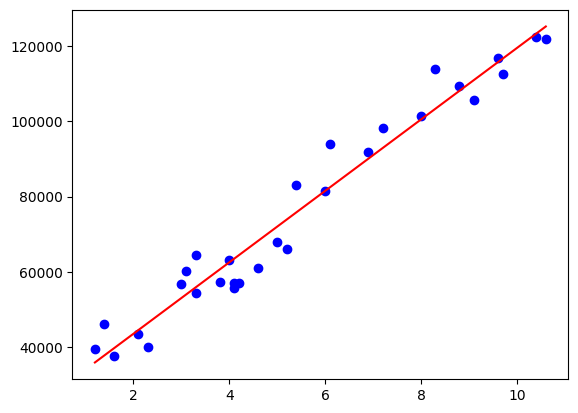

In [5]:
plt.scatter(x, y, label='Original', color='blue', linestyle='-') 
plt.plot(x, y_pred, label='Predicted', color='red', linestyle='-') 
plt.show()

In [6]:
def train_der(x, y):
    sum_x = 0.
    sum_y = 0.
    sum_xy = 0.
    sum_x2 = 0.
    n = len(x)  
    for i in range(n):
        sum_x += x[i]
        sum_y += y[i]
        sum_xy += x[i]*y[i]
        sum_x2 += x[i]**2
    x_m = sum_x/n
    y_m = sum_y/n
    a = (sum_xy - n*x_m*y_m)/(sum_x2-n*x_m**2)
    b = y_m - a*x_m
    return a, b

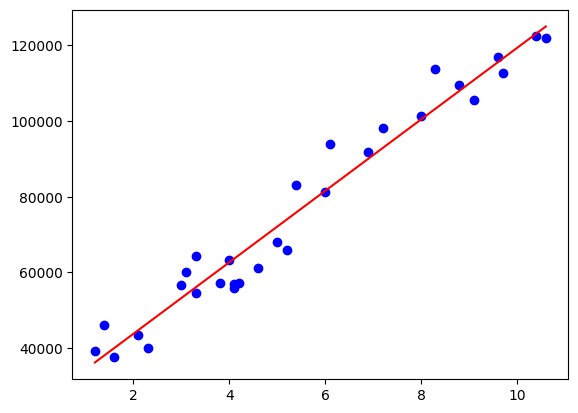

In [7]:
a, b = train_der(x, y)
y_pred_der = a*x + b
plt.scatter(x, y, label='Original', color='blue', linestyle='-') 
plt.plot(x, y_pred_der, label='Predicted', color='red', linestyle='-') 
plt.show()